In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
import pandas as pd
from matplotlib.cbook import boxplot_stats

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

**Load**

In [3]:
df = pd.read_table('/home/vanessa/Escritorio/Doctorado/anto_gitano_vane/distancias/dist_cg_void_3.dat',names=['GId','estado','tipo_vv'],
                 sep="\s+")
display(df.head(3))
display(df.shape)

,GId,estado,tipo_vv
0,1,1,1.0
1,2,1,0.0
2,3,1,0.0


(449, 3)

# Porcentajes

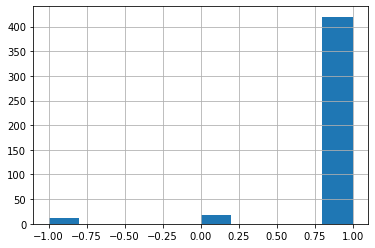

In [4]:
df.estado.hist()

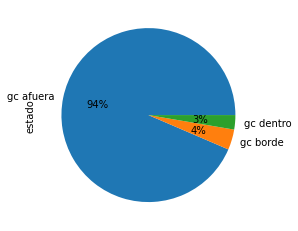

In [5]:
df['estado'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%',
                                                 labels=['gc afuera','gc borde', 'gc dentro'])
#plt.savefig('void_r_s.eps',format='eps')

In [6]:
df['estado'].value_counts(normalize=True)

 1    0.935412
 0    0.037862
-1    0.026726
Name: estado, dtype: float64

In [7]:
df.shape

(449, 3)

In [8]:
df1 = df[df.loc[:, 'estado'] != 1]

In [9]:
df1.shape

(29, 3)

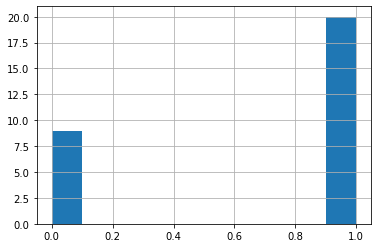

In [10]:
df1.tipo_vv.hist()

In [11]:
df1['tipo_vv'].value_counts(normalize=False)

1.0    20
0.0     9
Name: tipo_vv, dtype: int64

In [12]:
(20*100)/449


4.4543429844097995

In [13]:
(9*100)/449

2.0044543429844097

# Distancias

In [14]:
cgF=pd.read_table('/home/vanessa/Escritorio/Doctorado/anto_gitano_vane/distancias/dist_cg_void.dat',names=['GId','Ng','alcm','delcm','zmean','radiop','mu','sigmav','rbri','flag_cg','rcomv_cg','dij_N','estado','tipo_vv',
                                             'dijp_1000','t_cross','Rp'],
                 sep="\s+")
display(cgF.head(3))
display(cgF.shape)

,GId,Ng,alcm,delcm,zmean,radiop,mu,sigmav,rbri,flag_cg,rcomv_cg,dij_N,estado,tipo_vv,dijp_1000,t_cross,Rp
0,1,4,114.842,45.103,0.078292,2.620,25.018,348.679,14.719,0,230.282935,1.328269,1,1.0,************,0.037275,87.756597
1,2,4,116.577,22.020,0.046817,4.090,25.289,274.092,14.289,0,138.758218,1.860876,1,0.0,92313.200000,0.030544,82.543708
2,3,4,117.288,21.762,0.024476,9.769,26.134,136.700,13.359,0,72.920958,2.570684,1,0.0,************,0.116391,103.608818


(449, 17)

In [15]:
cgF1 = cgF[cgF['estado'] != 1]

In [16]:
cgF1.shape

(29, 17)

# CV-S

In [17]:
cgS=cgF1[cgF1['tipo_vv']>0]
display(cgS.shape)
cgS.dij_N.describe()

(20, 17)

count    20.000000
mean      0.843650
std       0.216327
min       0.424383
25%       0.698098
50%       0.896342
75%       1.044758
max       1.098577
Name: dij_N, dtype: float64

# CV-R

In [18]:
cgR=cgF1[cgF1['tipo_vv']==0]
display(cgR.shape)
cgR.dij_N.describe()

(9, 17)

count    9.000000
mean     0.953535
std      0.147419
min      0.638538
25%      0.956546
50%      1.039340
75%      1.045260
max      1.057515
Name: dij_N, dtype: float64

In [19]:
import matplotlib.patches as mpatches

Text(0, 0.5, 'distancias [Mpc/h]')

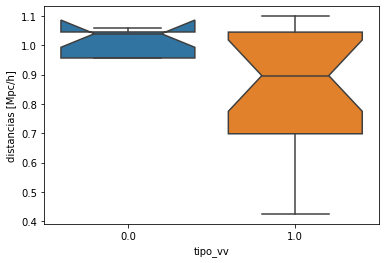

In [20]:
sns.boxplot(x=cgF1.tipo_vv,y=cgF1.dij_N, notch= True, showfliers = False)
plt.ylabel(r'distancias [Mpc/h]')

#plt.savefig('vertical_boxplot_dij_ggx.eps', format ='eps')

medianF 0.9565459999999999
medianR 1.03934
medianS 0.8963415


0.447213595499958

/home/vanessa/anaconda3/envs/machine-learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vanessa/anaconda3/envs/machine-learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vanessa/anaconda3/envs/machine-learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

<Figure size 360x3600 with 0 Axes>

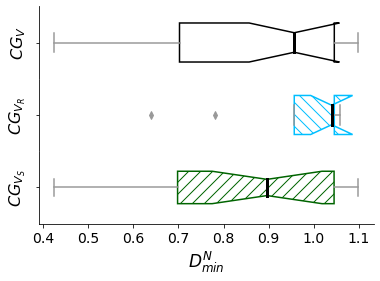

In [21]:
medianF=np.median(cgF1.dij_N)
print('medianF',medianF)
medianR=np.median(cgR.dij_N)
print('medianR',medianR)
medianS=np.median(cgS.dij_N)
print('medianS',medianS)

plt.figure(figsize=(5,50))

####subfiguras
f, (ax_box_F,ax_box_R,ax_box_S) = plt.subplots(3, sharex='col',
                                                         gridspec_kw = {'height_ratios':[15,15,15]})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.0)

#quitar los bordes
#sns.despine (ax = ax_hist)
sns.despine (ax = ax_box_F,left=False,bottom=True)
sns.despine (ax = ax_box_R,left=False,bottom=True)
sns.despine (ax = ax_box_S,left=False,bottom=False)

#Modifico los ticks
#ax_hist.tick_params(axis='x',direction ='inout',labelbottom =True)
ax_box_F.tick_params(bottom = False,labelbottom = False)
ax_box_R.tick_params(bottom = False,labelbottom = False)
ax_box_S.tick_params(bottom = True,labelbottom = True)

ax_box_S.xaxis.set_tick_params(labelsize=14)


####hist
#ax_hist.hist(cgF.dij_N, bins = np.arange(min(cgF.dij_N)-0.1,max(cgF.dij_N)+0.2,0.2),linestyle='solid',
         #histtype='bar',linewidth=2,color='slateblue',label= 'VC F',
          #   weights=np.ones_like(cgF.dij_N)/float(len(cgF.dij_N)))

#####boxplot

medianprops = dict(color='black',linewidth=3)
#marker='D', markeredgecolor='black'

TF=29**(0.5)
TR=9**(0.5)
TS=20**(0.5)
display(TS*0.1)

boxF=sns.boxplot(cgF1.dij_N, ax=ax_box_F, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
#sns.swarmplot(x=cgF1.dij_N, color=".25", ax=ax_box_F)
#sns.swarmplot(x=df1.rabs1, color=".25", ax=ax_box_F)

boxR=sns.boxplot(cgR.dij_N, ax=ax_box_R, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
#sns.swarmplot(x=cgR.dij_N, color=".25", ax=ax_box_R)

boxS=sns.boxplot(cgS.dij_N, ax=ax_box_S, notch= True, color='white', width=TS*0.1, medianprops=medianprops) 
#sns.swarmplot(x=cgS.dij_N, color=".25", ax=ax_box_S)

plt.setp(boxF.artists,edgecolor='black')
plt.setp(boxR.artists,hatch="\\\\",edgecolor='deepskyblue')
plt.setp(boxS.artists,hatch="//",edgecolor='darkgreen')


#box
#plt.xlabel(r'distancias mínimas cg-voids',fontsize=11)
#plt.ylabel('Frecuencia')
#plt.legend(loc="upper right")
#plt.legend(frameon=True)


#muestra_F = mpatches.Patch(color='bisque', label='voids F')
#muestra_R = mpatches.Patch(color='seagreen', label='voids R',hatch='\\\\',
                           #linewidth=2,linestyle='solid')
#muestra_S = mpatches.Patch(color='blue', label='voids S',hatch='////',
                           #linewidth=2,linestyle='solid')
#ax_hist.legend(handles=[muestra_F,muestra_R,muestra_S],loc=1,fontsize=7)

#plt.xlim((0.8,3.2))


ax_box_F.set_ylabel(r'$CG_{V}$', fontsize=16)
ax_box_R.set_ylabel(r'$CG_{V_{R}}$', fontsize=16)
ax_box_S.set_ylabel(r'$CG_{V_{S}}$', fontsize=16)

ax_box_R.set_xlabel('')
ax_box_S.set_xlabel(r'$D_{min}^{N}$',fontsize=17)


plt.savefig('distancias_cg_void.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [22]:
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

NameError: name 'tips' is not defined

# Radios Voids

In [ ]:
VC= pd.read_table('/home/vanessa/Escritorio/Doctorado/anto_gitano_vane/distancias/voids_filtrados_f.dat',
                  names=['Radio_v','RA','DEC','z','d','Pos_X','Pos_Y','Pos_Z','delta1','delta23','flag','tipo'],sep="\s+")
display(VC.head(3))
display(VC.shape)

In [ ]:
VC.Radio_v.describe()

In [ ]:
VC_R=VC[VC['delta23']<0]
display(VC_R.shape)
VC_S=VC[VC['delta23']>0]
display(VC_S.shape)

In [ ]:
plt.figure(figsize=(10,50))

####subfiguras
f, (ax_box_F,ax_box_R,ax_box_S) = plt.subplots(3, sharex='col',
                                                         gridspec_kw = {'height_ratios':[15,15,15]})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.0)

#quitar los bordes
#sns.despine (ax = ax_hist)
sns.despine (ax = ax_box_F,left=False,bottom=True)
sns.despine (ax = ax_box_R,left=False,bottom=True)
sns.despine (ax = ax_box_S,left=False,bottom=False)

#Modifico los ticks
#ax_hist.tick_params(axis='x',direction ='inout',labelbottom =True)
ax_box_F.tick_params(bottom = False,labelbottom = False)
ax_box_R.tick_params(bottom = False,labelbottom = False)
ax_box_S.tick_params(bottom = True,labelbottom = True)

ax_box_S.xaxis.set_tick_params(labelsize=14)

####hist
#ax_hist.hist(cgF.dij_N, bins = np.arange(min(cgF.dij_N)-0.1,max(cgF.dij_N)+0.2,0.2),linestyle='solid',
         #histtype='bar',linewidth=2,color='slateblue',label= 'VC F',
          #   weights=np.ones_like(cgF.dij_N)/float(len(cgF.dij_N)))

#####boxplot

medianprops = dict(color='black',linewidth=3)
#marker='D', markeredgecolor='black'

TF=360**(0.5)*0.45
TR=155**(0.5)*0.45
TS=205**(0.5)*0.45


boxF=sns.boxplot(VC.Radio_v, ax=ax_box_F, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
boxR=sns.boxplot(VC_R.Radio_v, ax=ax_box_R, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
boxS=sns.boxplot(VC_S.Radio_v, ax=ax_box_S, notch= True, color='white', width=TS*0.1, medianprops=medianprops) 

plt.setp(boxF.artists,edgecolor='black')
plt.setp(boxR.artists,hatch="\\\\",edgecolor='indigo')
plt.setp(boxS.artists,hatch="//",edgecolor='DarkMagenta')


#box
#plt.xlabel(r'distancias mínimas cg-voids',fontsize=11)
#plt.ylabel('Frecuencia')
#plt.legend(loc="upper right")
#plt.legend(frameon=True)


#muestra_F = mpatches.Patch(color='bisque', label='voids F')
#muestra_R = mpatches.Patch(color='seagreen', label='voids R',hatch='\\\\',
                           #linewidth=2,linestyle='solid')
#muestra_S = mpatches.Patch(color='blue', label='voids S',hatch='////',
                           #linewidth=2,linestyle='solid')
#ax_hist.legend(handles=[muestra_F,muestra_R,muestra_S],loc=1,fontsize=7)

#plt.xlim((0.8,3.2))


ax_box_F.set_ylabel('CVs', fontsize=18)
ax_box_R.set_ylabel('CV-R', fontsize=18)
ax_box_S.set_ylabel('CV-S', fontsize=18)

ax_box_R.set_xlabel('')
ax_box_S.set_xlabel('r [Mpc $h^{-1}$]',fontsize=18)


plt.savefig('rad_voidsFRS_s.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [ ]:
VC.describe()

In [ ]:
VC_R.describe()

In [ ]:
VC_S.describe()

In [ ]:
z_v= np.genfromtxt('/home/vanessa/Escritorio/Doctorado/anto_gitano_vane/muestras_filtradas/void/voids_z0.10.dat',unpack=True,usecols=3)
plt.hist(z_v)
plt.hist(z_cg, alpha=0.5)
plt.xlabel('$z_{voids}$')
plt.ylabel('frecuencia')

plt.savefig('z_{voids}.pdf', format='pdf')

In [ ]:
z_cg = cgF['zmean']
